In [24]:
#https://www.youtube.com/watch?v=yQtT_4RgT2k&t=931s
import datetime as dt 
import pandas as pd
from pandas_datareader import data as pdr 
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

In [25]:
end = dt.datetime.now()
start = dt.datetime(2015,1,1)
start, end

df = pdr.get_data_yahoo('CBA.AX', start, end)
df.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2015-01-01  85.277962  84.661308  84.959686  85.277962   949439.0  60.323940
2015-01-04  85.775269  85.049202  85.238182  85.486832  1351651.0  60.471684
2015-01-05  85.337639  84.412651  84.641411  84.840332  2477275.0  60.014370
2015-01-06  85.029312  84.094376  84.850281  84.651360  2127190.0  59.880692
2015-01-07  85.188446  84.671249  85.079041  84.929848  1997761.0  60.077682

In [26]:
df['MA50'] = df['Close'].rolling(window=50, min_periods=0).mean()
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean()
df['MA50'].head()

Date
2015-01-01    85.277962
2015-01-04    85.382397
2015-01-05    85.201708
2015-01-06    85.064121
2015-01-07    85.037267
Name: MA50, dtype: float64

In [27]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                   vertical_spacing=0.1, subplot_titles=('CBA', 'Volume'),
                    row_width=[0.2,0.7])

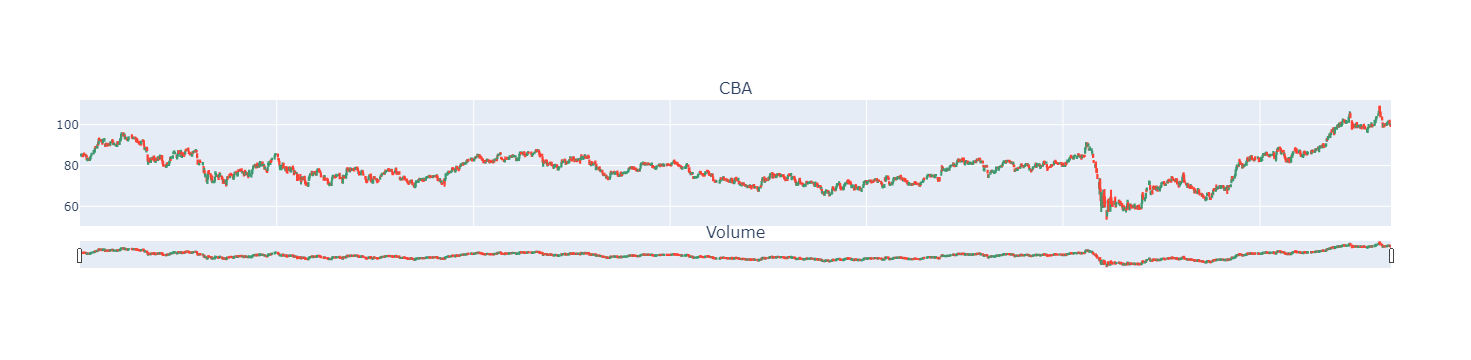

In [28]:
fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name = 'OHLC'), row=1,col=1)

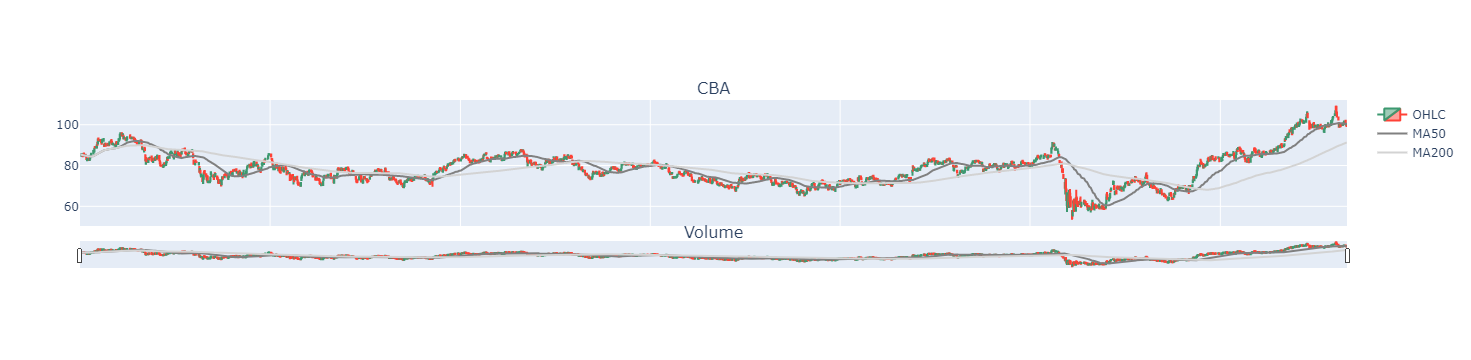

In [29]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'),row=1,col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='lightgrey', name='MA200'),row=1,col=1)

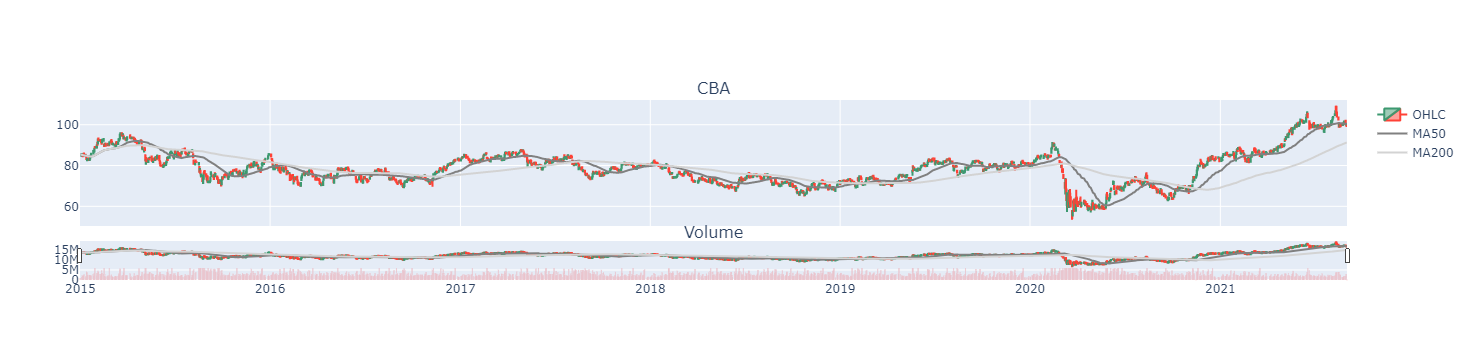

In [32]:
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='red', showlegend=False),row=2, col=1)

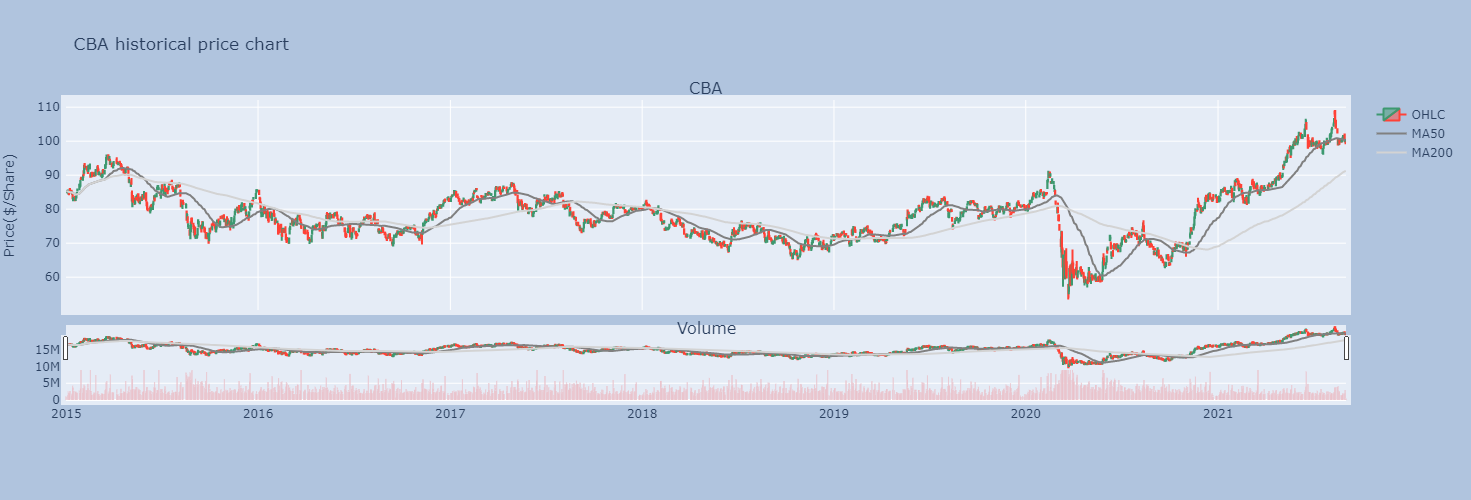

In [36]:
fig.update_layout(
    title = 'CBA historical price chart',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title='Price($/Share)',
        titlefont_size=14,
        tickfont_size=12
        ),
    autosize=False,
    width=800,
    height=500, 
    margin=dict(l=50,r=50,b=100,t=100,pad=5),
    paper_bgcolor = 'LightSteelBlue')

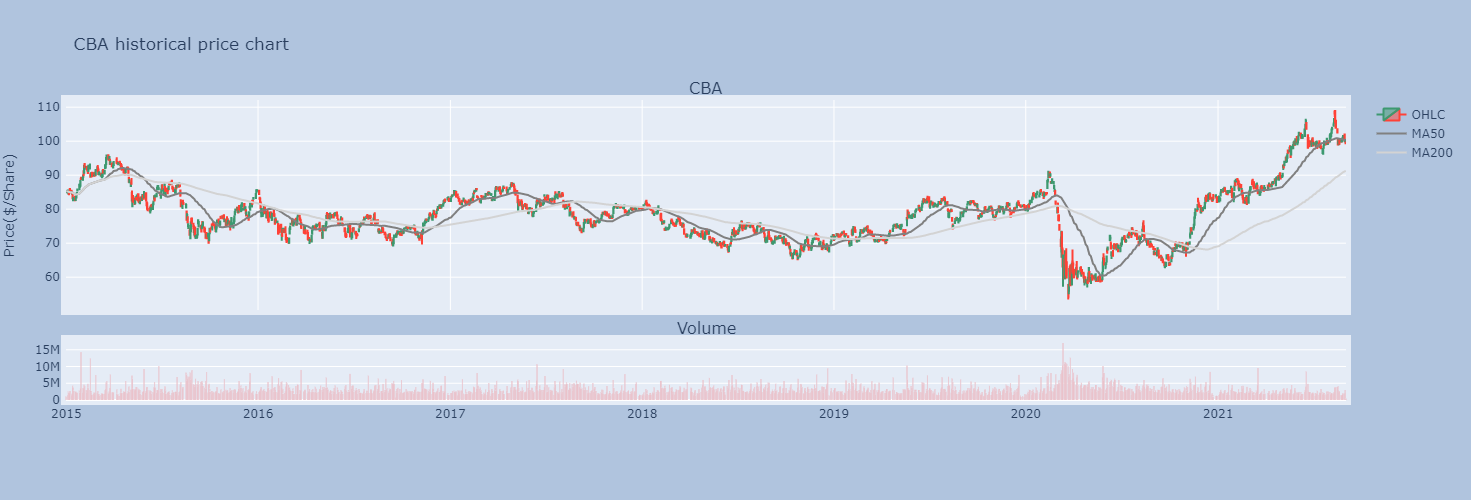

In [39]:
fig.update(layout_xaxis_rangeslider_visible=False)